In [9]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

In [10]:
test_data=pd.read_csv(r"C:\Users\navde\Downloads\tblTest.csv")
train_data=pd.read_csv(r"C:\Users\navde\Downloads\tblTrain.csv")


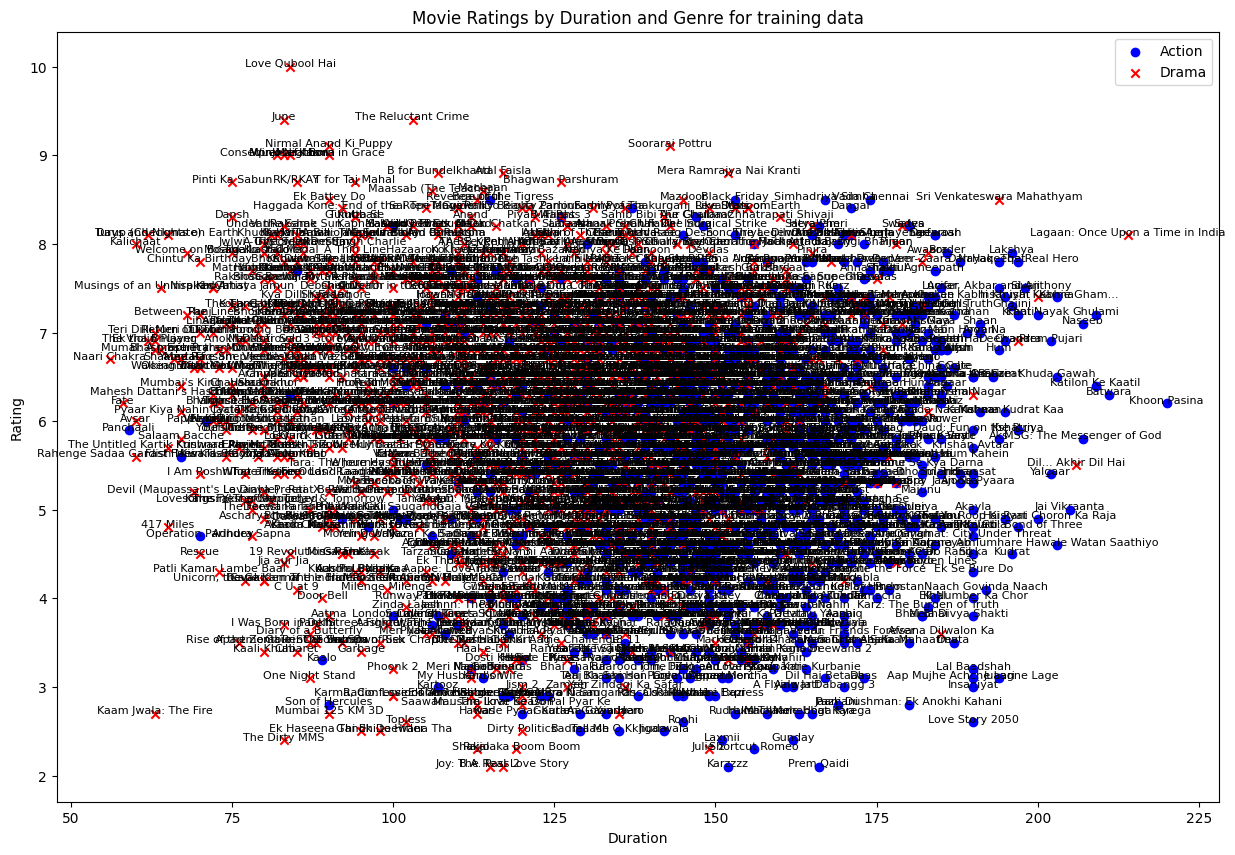

In [11]:
# labels stored in a list so that iteration is not required on dataframe and the code is more efficient in terms of execution becoz accessing list is faster than dataframe

plt.figure(figsize=(15, 10))

grouped_data = train_data.groupby('Genre')

genre_markers = {'Action': 'o', 'Drama': 'x'}
genre_colors = {'Action': 'blue', 'Drama': 'red'}

for genre, data in grouped_data:
    plt.scatter(data['Duration'], data['Rating'], label=genre, marker=genre_markers.get(genre, 'o'), c=genre_colors.get(genre, 'blue'))

text_labels = train_data['Name']
for i, label in enumerate(text_labels):
    plt.text(train_data['Duration'].iloc[i], train_data['Rating'].iloc[i], label, fontsize=8, ha='center', color='black')

plt.xlabel('Duration')
plt.ylabel('Rating')

plt.legend()
plt.title('Movie Ratings by Duration and Genre for training data')
plt.show()



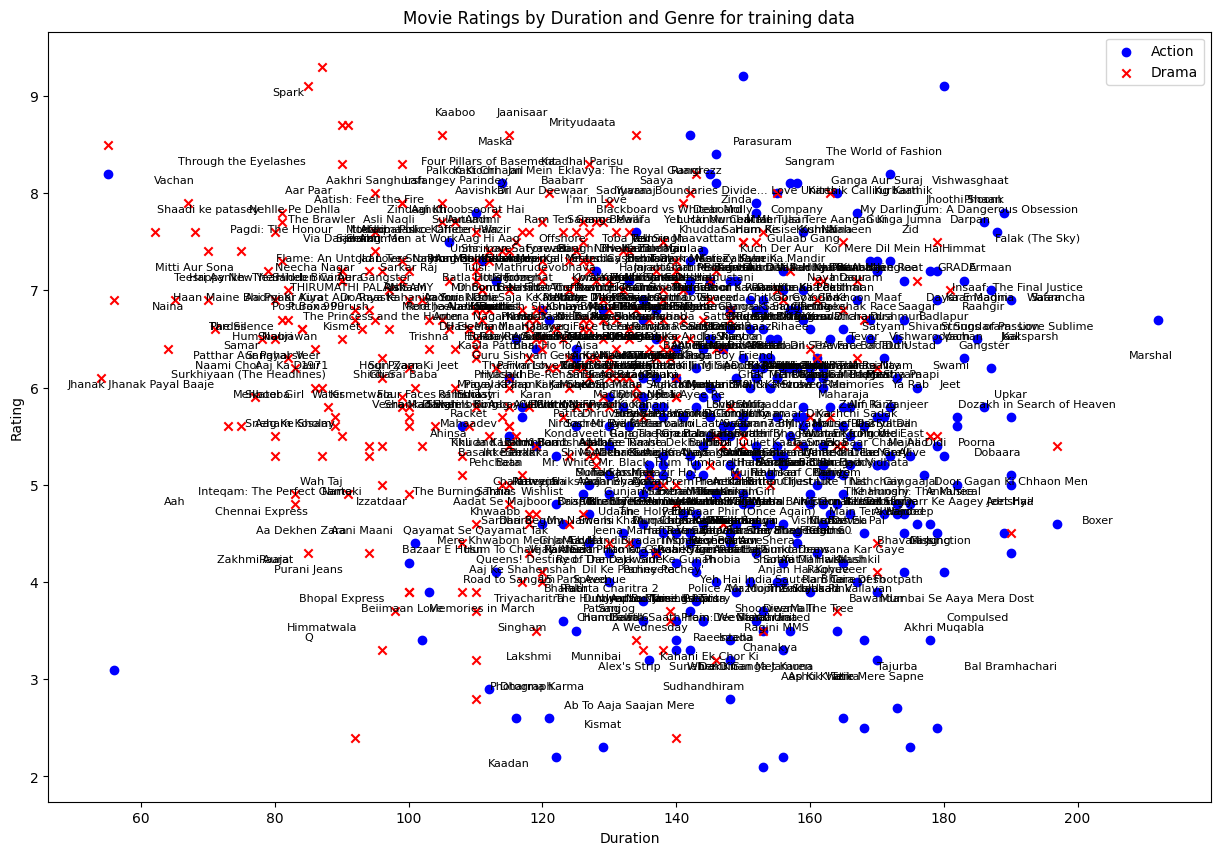

In [12]:
plt.figure(figsize=(15, 10))

# Group the training data by genre
grouped_data = test_data.groupby('Genre')

# Define markers and colors for each genre
genre_markers = {'Action': 'o', 'Drama': 'x'}
genre_colors = {'Action': 'blue', 'Drama': 'red'}

# Plot each genre directly from the grouped data
for genre, data in grouped_data:
    plt.scatter(data['Duration'], data['Rating'], label=genre, marker=genre_markers.get(genre, 'o'), c=genre_colors.get(genre, 'blue'))

# Annotate points with movie names using seaborn's scatterplot
text_labels = test_data['Name']
for i, label in enumerate(text_labels):
    plt.text(train_data['Duration'].iloc[i], train_data['Rating'].iloc[i], label, fontsize=8, ha='center', color='black')

plt.xlabel('Duration')
plt.ylabel('Rating')

plt.legend()
plt.title('Movie Ratings by Duration and Genre for training data')
plt.show()

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Assuming new variable names
X_train_data = train_data[['Duration', 'Rating']]
y_train_data = train_data['Genre']
X_test_data = test_data[['Duration', 'Rating']]
y_test_data = test_data['Genre']

k_values = list(range(1, 500, 2))

accuracy_values = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_data, y_train_data)
    
    y_pred_data = knn_model.predict(X_test_data)
    
    # Calculate the confusion matrix
    confusion_mat = confusion_matrix(y_test_data, y_pred_data)
    
    # Calculate accuracy
    accuracy_value = accuracy_score(y_test_data, y_pred_data)
    accuracy_values.append(accuracy_value)

optimal_k_value = k_values[accuracy_values.index(max(accuracy_values))]
max_accuracy_value = max(accuracy_values)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o')
plt.title('Accuracy vs No. of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.show()

print("Optimal value for k:", optimal_k_value)
print("Maximum Accuracy:", max_accuracy_value)


In [ ]:
# Use the optimal k to calculate metrics
optimal_k_classifier = KNeighborsClassifier(n_neighbors=optimal_k_value)
optimal_k_classifier.fit(X_train_data, y_train_data)
y_pred_optimal_k = optimal_k_classifier.predict(X_test_data)
cm_optimum= confusion_matrix(y_test_data, y_pred_optimal_k)

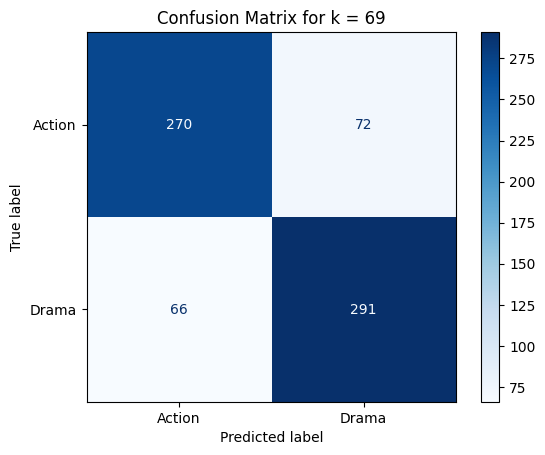

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_optimum, display_labels=['Action', 'Drama'])
disp.plot(cmap='Blues', values_format='d')
plt.title(f'Confusion Matrix for k = {optimal_k}')
plt.show()

In [ ]:
# Calculate performance metrics
precision = precision_score(y_test, y_pred_optimal_k, pos_label='Drama')
recall = recall_score(y_test, y_pred_optimal_k, pos_label='Drama')
overall_precision = precision_score(y_test, y_pred_optimal_k, average='weighted')
overall_recall = recall_score(y_test, y_pred_optimal_k, average='weighted')
f_score = f1_score(y_test, y_pred_optimal_k, average='weighted')


# Print performance metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall: {overall_recall:.4f}")
print(f"F-Score: {f_score:.4f}")

Precision: 0.8017
Recall: 0.8151
Overall Precision: 0.8026
Overall Recall: 0.8026
F-Score: 0.8025
